<a href="https://colab.research.google.com/github/shahroj88/Sales_April_2019/blob/main/SalesApril2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.	Load the dataset into a pandas DataFrame and inspect its structure.

In [ ]:
df=pd.read_csv('Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# 2.	Extract 'City' and 'State' information from the Purchase Address column and add these as separate columns.


In [ ]:
def get_city_state(address):
    if address == None or pd.isnull(address):
        return pd.Series([None, None])
    parts = str(address).split(',')
    if len(parts) > 2:
        city = parts[-2].strip()
        state = parts[-1].strip().split(' ')[0]
    else:
        city = None
        state = None
    return pd.Series([city, state])

In [ ]:
df[['City', 'State']] = df['Purchase Address'].apply(get_city_state)

In [ ]:
df[['Purchase Address', 'City', 'State']].head()

,Purchase Address,City,State
0,"917 1st St, Dallas, TX 75001",Dallas,TX
1,NaN,None,None
2,"682 Chestnut St, Boston, MA 02215",Boston,MA
3,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas,TX
1,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston,MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA


# 3.	Calculate total sales (Quantity Ordered * Price Each) and create a new column Total Sales.

In [ ]:
df['Total Sales'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce') * pd.to_numeric(df['Price Each'], errors='coerce')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas,TX,23.90
1,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston,MA,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,11.99


# 4.	Find out the top 5 products sold by total sales value.

In [ ]:
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5)
print(top_products)

Product
Macbook Pro Laptop        773500.00
iPhone                    486500.00
ThinkPad Laptop           391996.08
Google Phone              348600.00
34in Ultrawide Monitor    248133.47
Name: Total Sales, dtype: float64


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas,TX,23.90
1,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston,MA,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,11.99


# 5.	Identify the city with the highest sales in April 2019.




In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,TX,23.90
1,NaN,NaN,NaN,NaN,NaT,NaN,None,None,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,MA,99.99
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,11.99


In [ ]:
april_data = df[(df['Order Date'].dt.month == 4) & (df['Order Date'].dt.year == 2019)]
city_sales = april_data.groupby('City')['Total Sales'].sum()
print(city_sales.sort_values(ascending=False).head(1))

City
San Francisco    812423.2
Name: Total Sales, dtype: float64


# 6.	Aggregate and plot total sales by date to identify sales trends throughout the month.

In [ ]:
daily_sales = df.groupby(df['Order Date'].dt.date)['Total Sales'].sum()

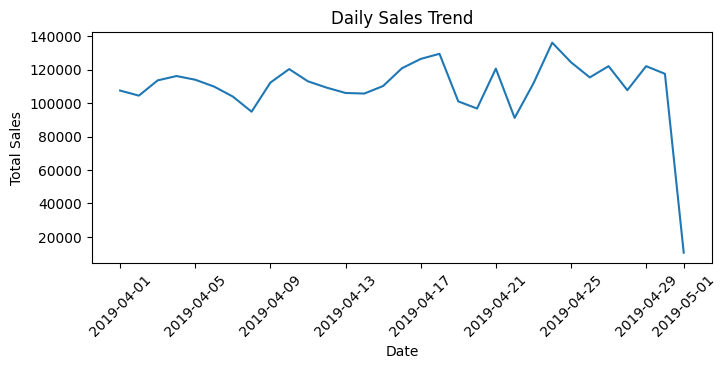

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.show()